In [75]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')


In [76]:
#Reading data
data = pd.read_csv("bank-full (2).csv", sep=";")

In [77]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [79]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [80]:
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [81]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [82]:
data.replace('unknown',np.NaN,inplace=True)

In [83]:
dupls = data.duplicated()
print(dupls.any())

False


In [84]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [85]:
countNo = len(data[data.y == 'no'])
countYes = len(data[data.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(data.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(data.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


In [86]:
data._get_numeric_data().columns.tolist()

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [87]:
from sklearn.preprocessing import StandardScaler

#Copying original dataframe
bank_ready = data.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
bank_ready[num_cols] = scaler.fit_transform(bank_ready[num_cols])

bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,management,married,tertiary,no,0.256419,yes,no,NaN,-1.298476,may,261,-0.569351,-0.411453,-0.25194,NaN,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,NaN,-1.298476,may,151,-0.569351,-0.411453,-0.25194,NaN,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,NaN,-1.298476,may,76,-0.569351,-0.411453,-0.25194,NaN,no
3,0.571051,blue-collar,married,NaN,no,0.047205,yes,no,NaN,-1.298476,may,92,-0.569351,-0.411453,-0.25194,NaN,no
4,-0.747384,NaN,single,NaN,no,-0.447091,no,no,NaN,-1.298476,may,198,-0.569351,-0.411453,-0.25194,NaN,no


In [88]:
#Features
feature = bank_ready.drop('y', axis=1)

#Target
target = bank_ready['y']

#Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

#Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (36168, 16)
Shape of testing feature: (9043, 16)
Shape of training label: (36168,)
Shape of training label: (9043,)


In [89]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
data['age_category'] = data['age_category'].astype(np.int64)
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
age_category     int64
dtype: object

# Data Visualization

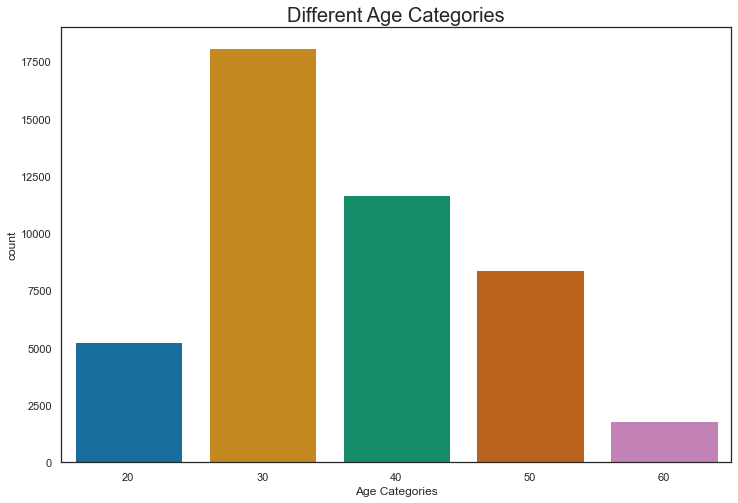

In [90]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=data, palette="colorblind")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()


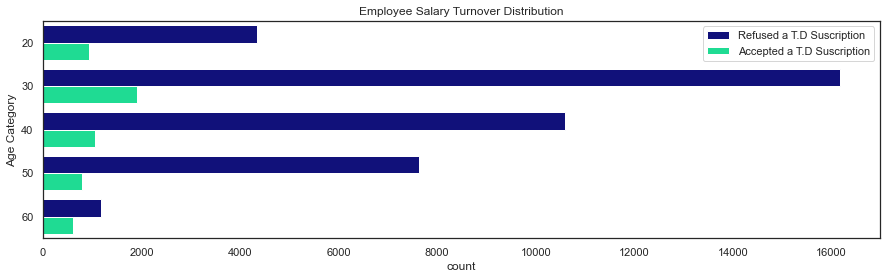

In [91]:
# There was a positive ratio of Suscribing Term Deposits  of people in their 20s (or younger) and 60s (or older)
sns.set(style="white")
fig, ax = plt.subplots(figsize=(15, 4))
colors = ["#00008B", "#00FA9A"]
labels = ['No Deposit', 'Deposit']
sns.countplot(y="age_category", hue='y', data=data, palette=colors).set_title('Employee Salary Turnover Distribution')
ax.set_ylabel("Age Category")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused a T.D Suscription')
legend_name.get_texts()[1].set_text('Accepted a T.D Suscription')

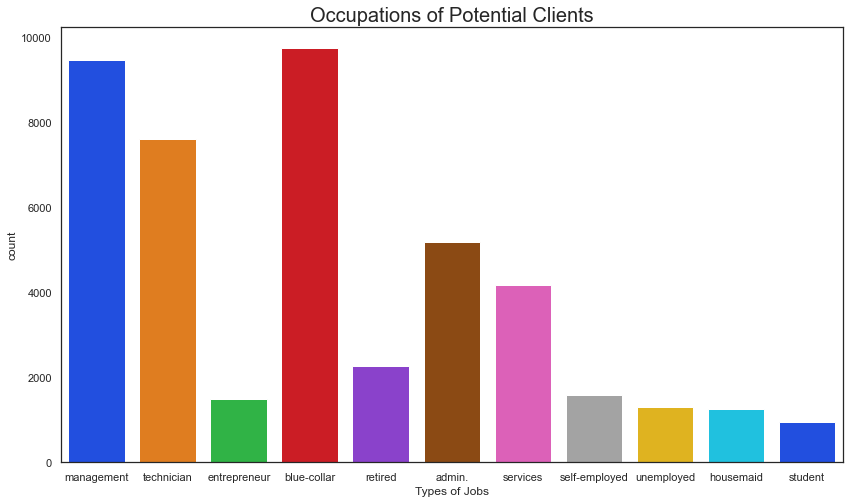

In [92]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", data=data, palette="bright")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

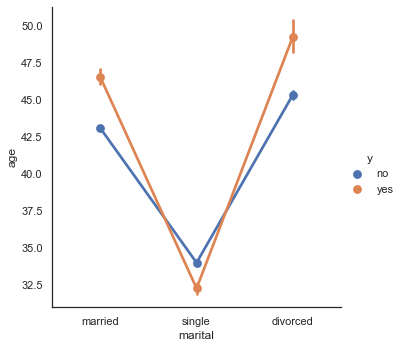

In [93]:
sns.factorplot('marital','age',hue='y',data=data)


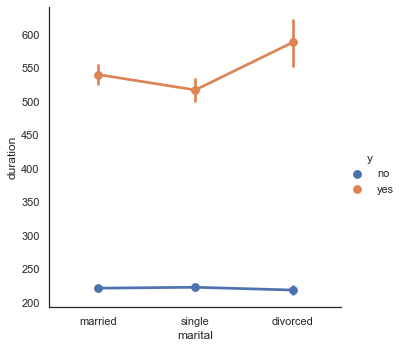

In [94]:
sns.factorplot('marital','duration',hue='y',data=data)


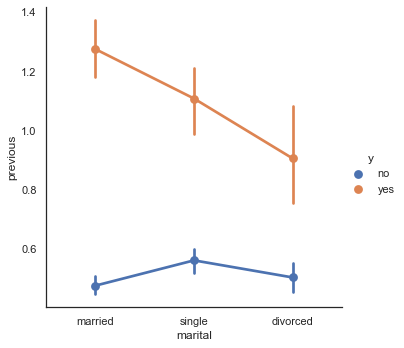

In [95]:
sns.factorplot('marital','previous',hue='y',data=data)


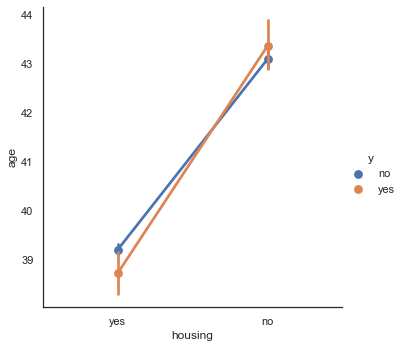

In [96]:
sns.factorplot('housing','age',hue='y',data=data)


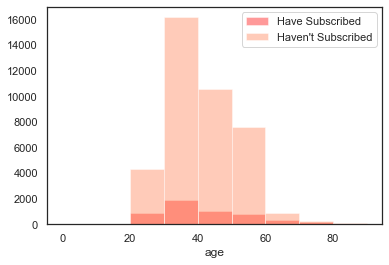

In [97]:
# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns
bins = range(0, 100, 10)
ax = sns.distplot(data.age[data.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(data.age[data.y=='no'],
         ax=ax,  # Overplots on first plot
         color='coral', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

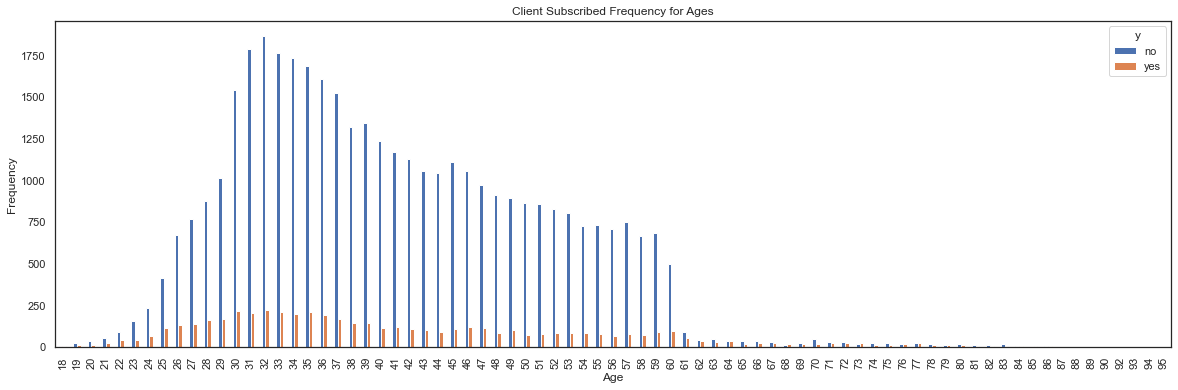

In [98]:
pd.crosstab(data.age,data.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

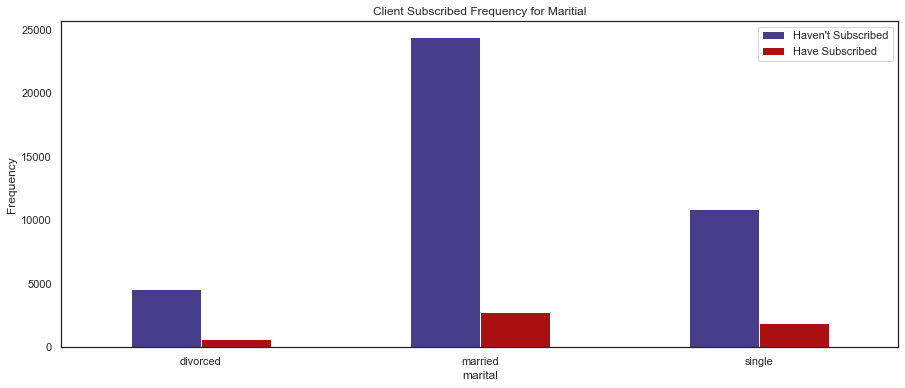

In [99]:
pd.crosstab(data.marital,data.y).plot(kind="bar",figsize=(15,6),color=['#483D8B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

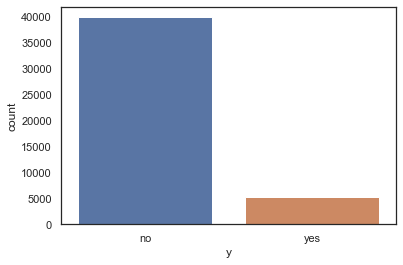

In [100]:
sns.countplot(x='y', data=data, label='Count')


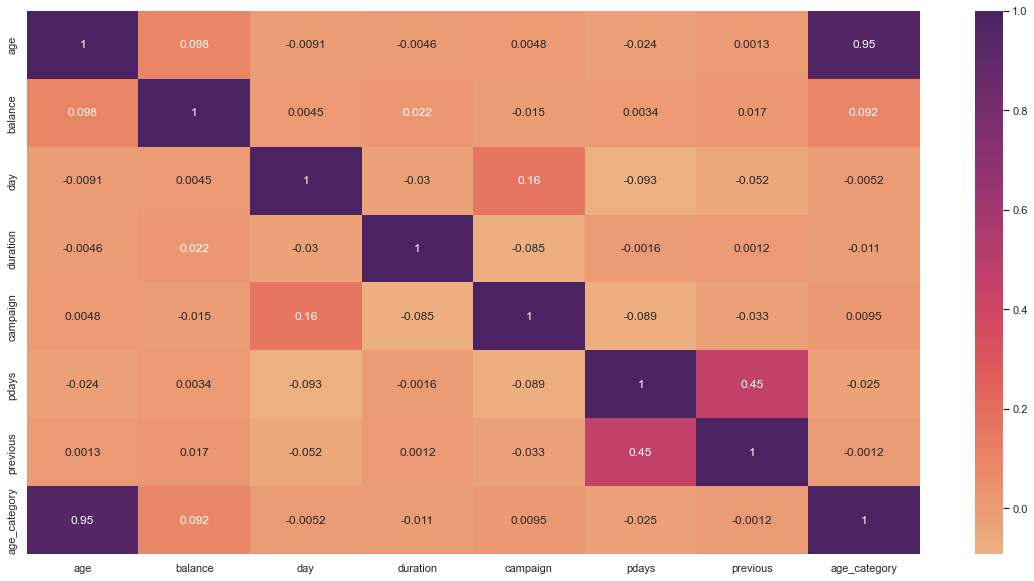

In [101]:
plt.figure(figsize = (20, 10))
corr=data.corr()
sns.heatmap(corr, annot = True, cmap="flare")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

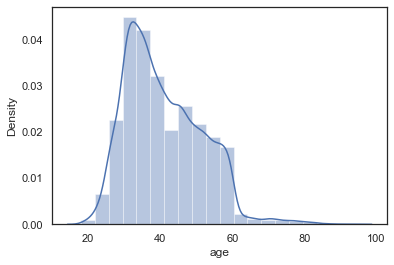

In [102]:
sns.distplot(data.age, bins = 20) 

<AxesSubplot:xlabel='duration', ylabel='Density'>

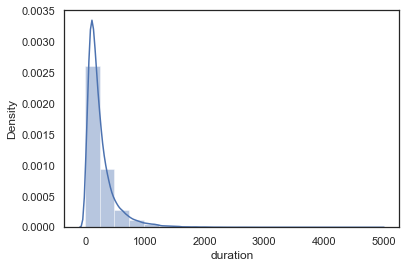

In [103]:
sns.distplot(data.duration, bins = 20)

<AxesSubplot:xlabel='balance', ylabel='Density'>

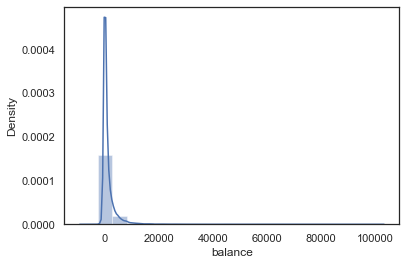

In [104]:
sns.distplot(data.balance, bins = 20)

In [105]:
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day','poutcome']
data[encoding_list] = data[encoding_list].apply(LabelEncoder().fit_transform)

In [106]:
#definiing X and Y
Y = data['y']
X = data.drop('y', axis=1)

In [107]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.3, random_state=2)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(31647, 17)
(13564, 17)
(31647,)
(13564,)


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [109]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [110]:
y_pre = model.predict(X_test_scaled)

In [111]:
accuracy_score(y_test, y_pre)

0.8930993807136538

In [112]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11999
         yes       0.61      0.20      0.30      1565

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

